<IPython.core.display.Javascript object>


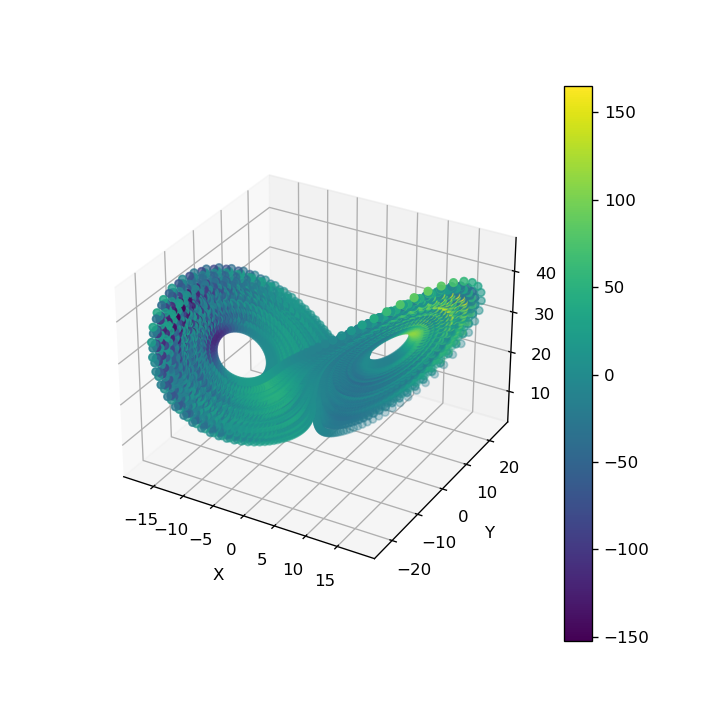

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
import os
from scipy.signal import convolve2d as conv2
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import utils
%matplotlib notebook
import systems

fi = lambda x,t: systems.lorentz(t,x)
Ji = lambda x: systems.Jlorentz(x)
d = 3


transient_count = 5
dt = 0.01
T = 100
t = np.arange(0, T+transient_count, dt)
a0 = np.array([-1,1,1]) #chua
a0 = np.array([45,45,40]) #lor
xi = odeint(fi, a0, t)
xi = xi[int(transient_count//dt):,:] #remove transient
e = np.zeros((len(xi),d-1),dtype=np.complex128)
v = np.zeros((len(xi),d-1,d-1),dtype=np.complex128)
rotation_manager = utils.rot_keeper(d=d)

for i,x in enumerate(xi):
    J=np.array(Ji(x))
    ds = fi(x,0)
    R=rotation_manager.get_rot(ds)
    G = (R@J)
    e[i,:] = np.diag(G[1:,1:])


fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')
p = ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.prod(np.real(e),axis=1))
fig.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



<IPython.core.display.Javascript object>


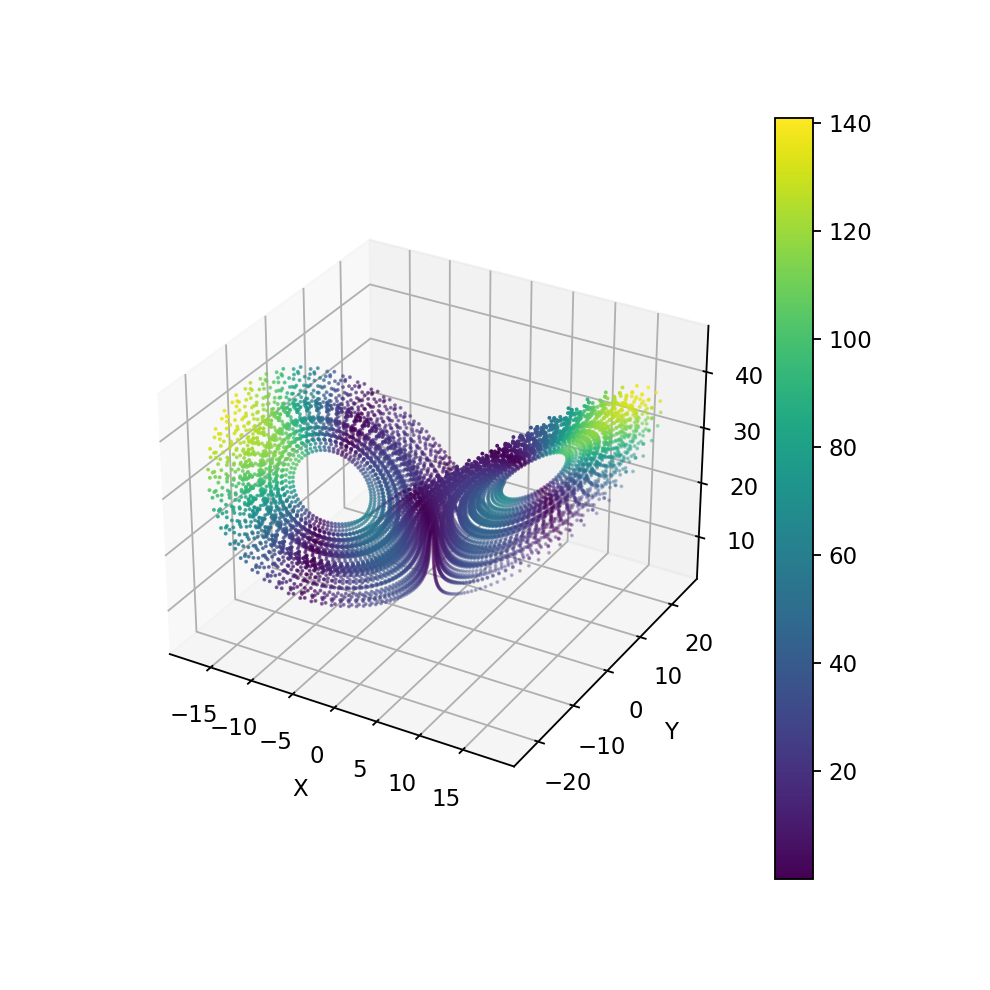

In [25]:
fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')
p = ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.max(np.abs(e),axis=1))
fig.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


<IPython.core.display.Javascript object>


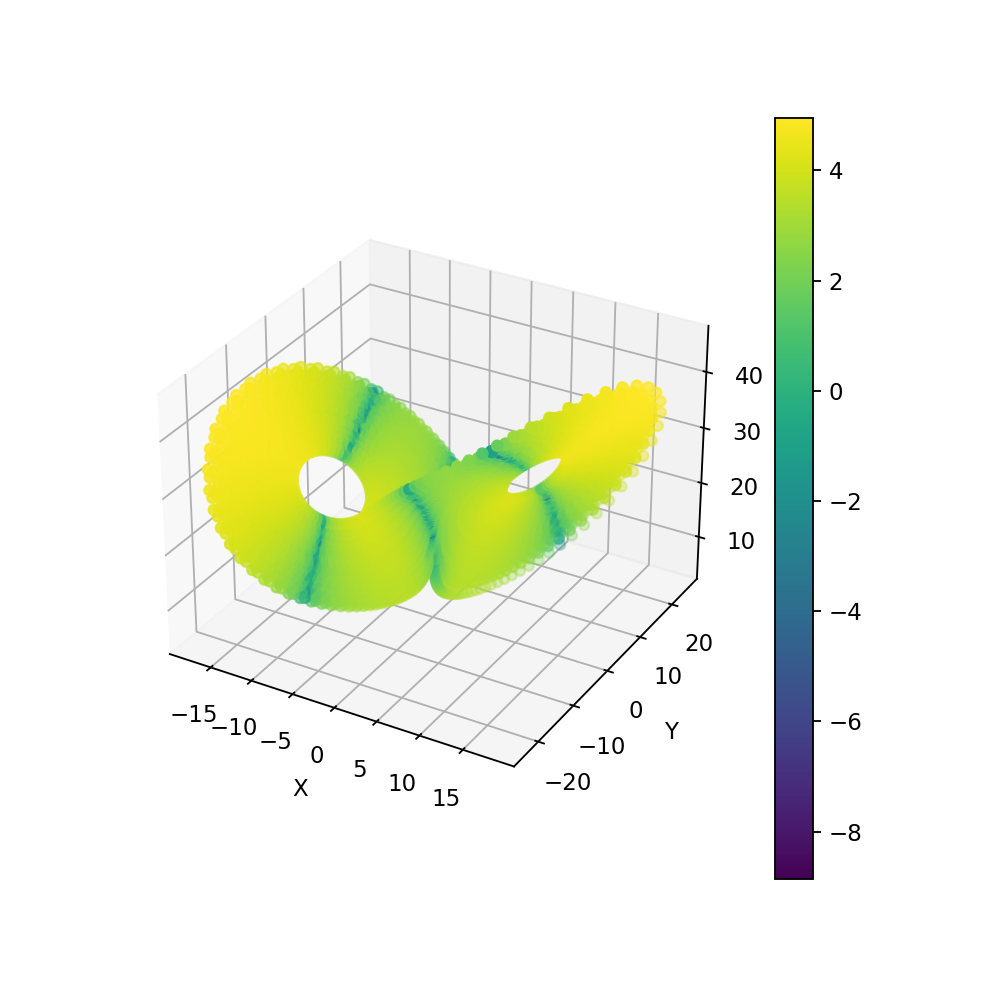

In [31]:
fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')
p = ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.log(np.abs(e[:,0])))
fig.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


<IPython.core.display.Javascript object>


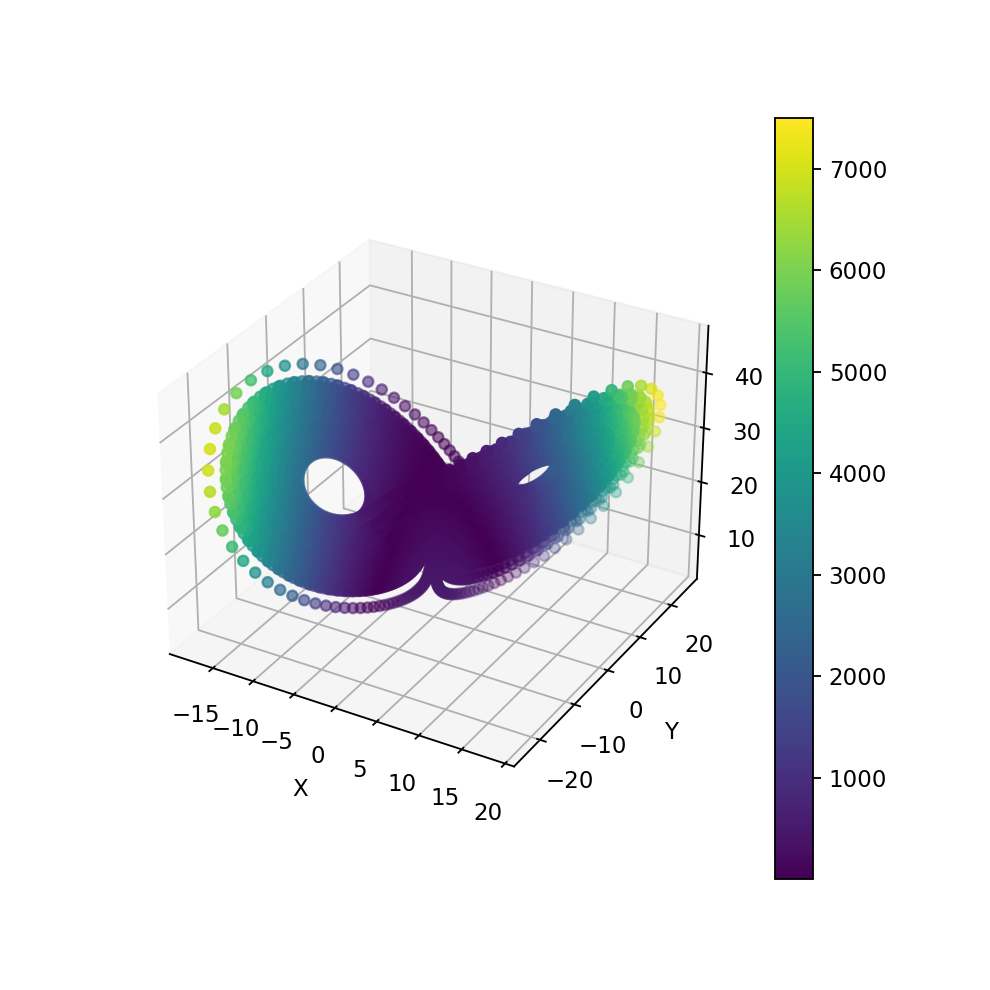

In [33]:
a0 = np.array([-1,1,1]) #chua
#a0 = np.array([45,45,40]) #lor
xi = odeint(fi, a0, t)
xi = xi[int(transient_count//dt):,:] #remove transient
e = np.zeros((len(xi),d),dtype=np.complex128)
v = np.zeros((len(xi),d-1,d-1),dtype=np.complex128)
rotation_manager = utils.rot_keeper(d=d)

for i,x in enumerate(xi):
    J=np.array(Ji(x))
    e[i,0] = np.linalg.det(J)


fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')
p = ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.max(np.abs(e),axis=1))
fig.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



In [38]:
ax.collection

<IPython.core.display.Javascript object>


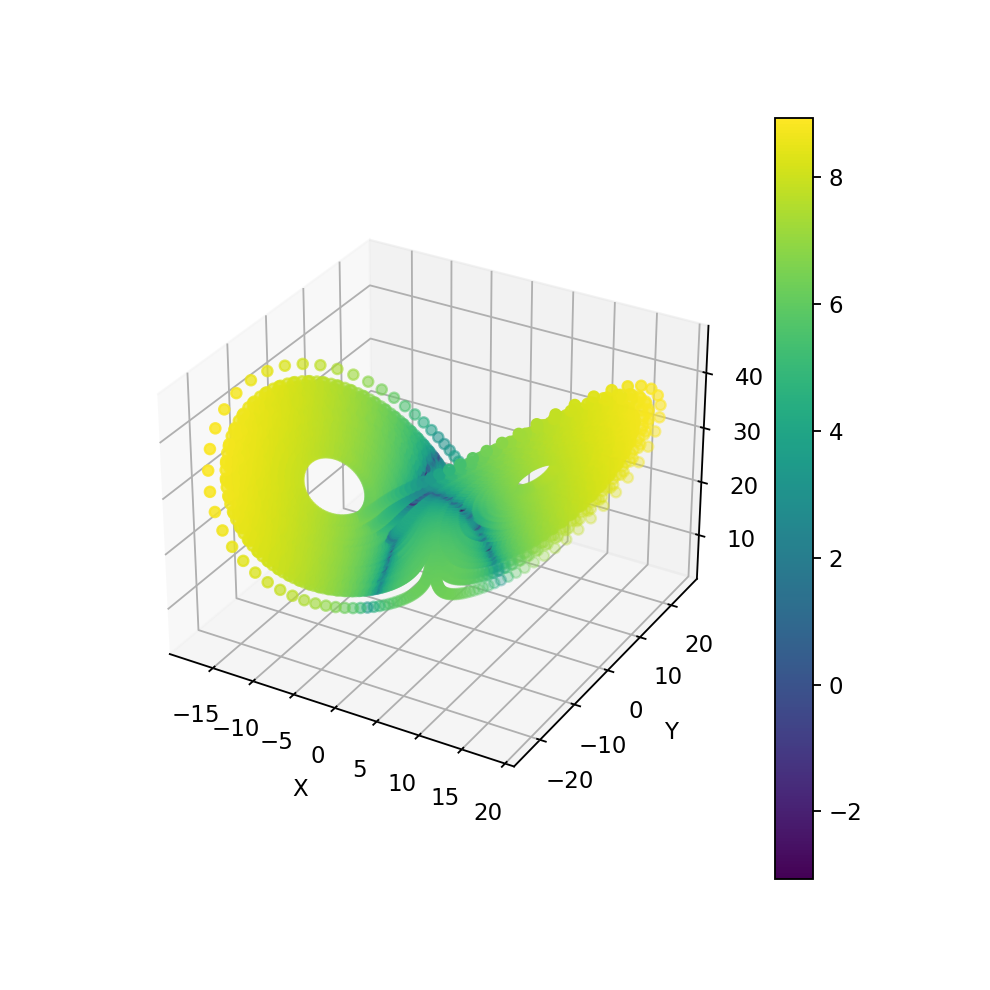

C:\Users\water\AppData\Local\Temp/ipykernel_19976/1445948005.py:3: RuntimeWarning: divide by zero encountered in log
  p = ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.max(np.log(np.abs(e)),axis=1))


In [35]:
fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')
p = ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.max(np.log(np.abs(e)),axis=1))
fig.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


<IPython.core.display.Javascript object>


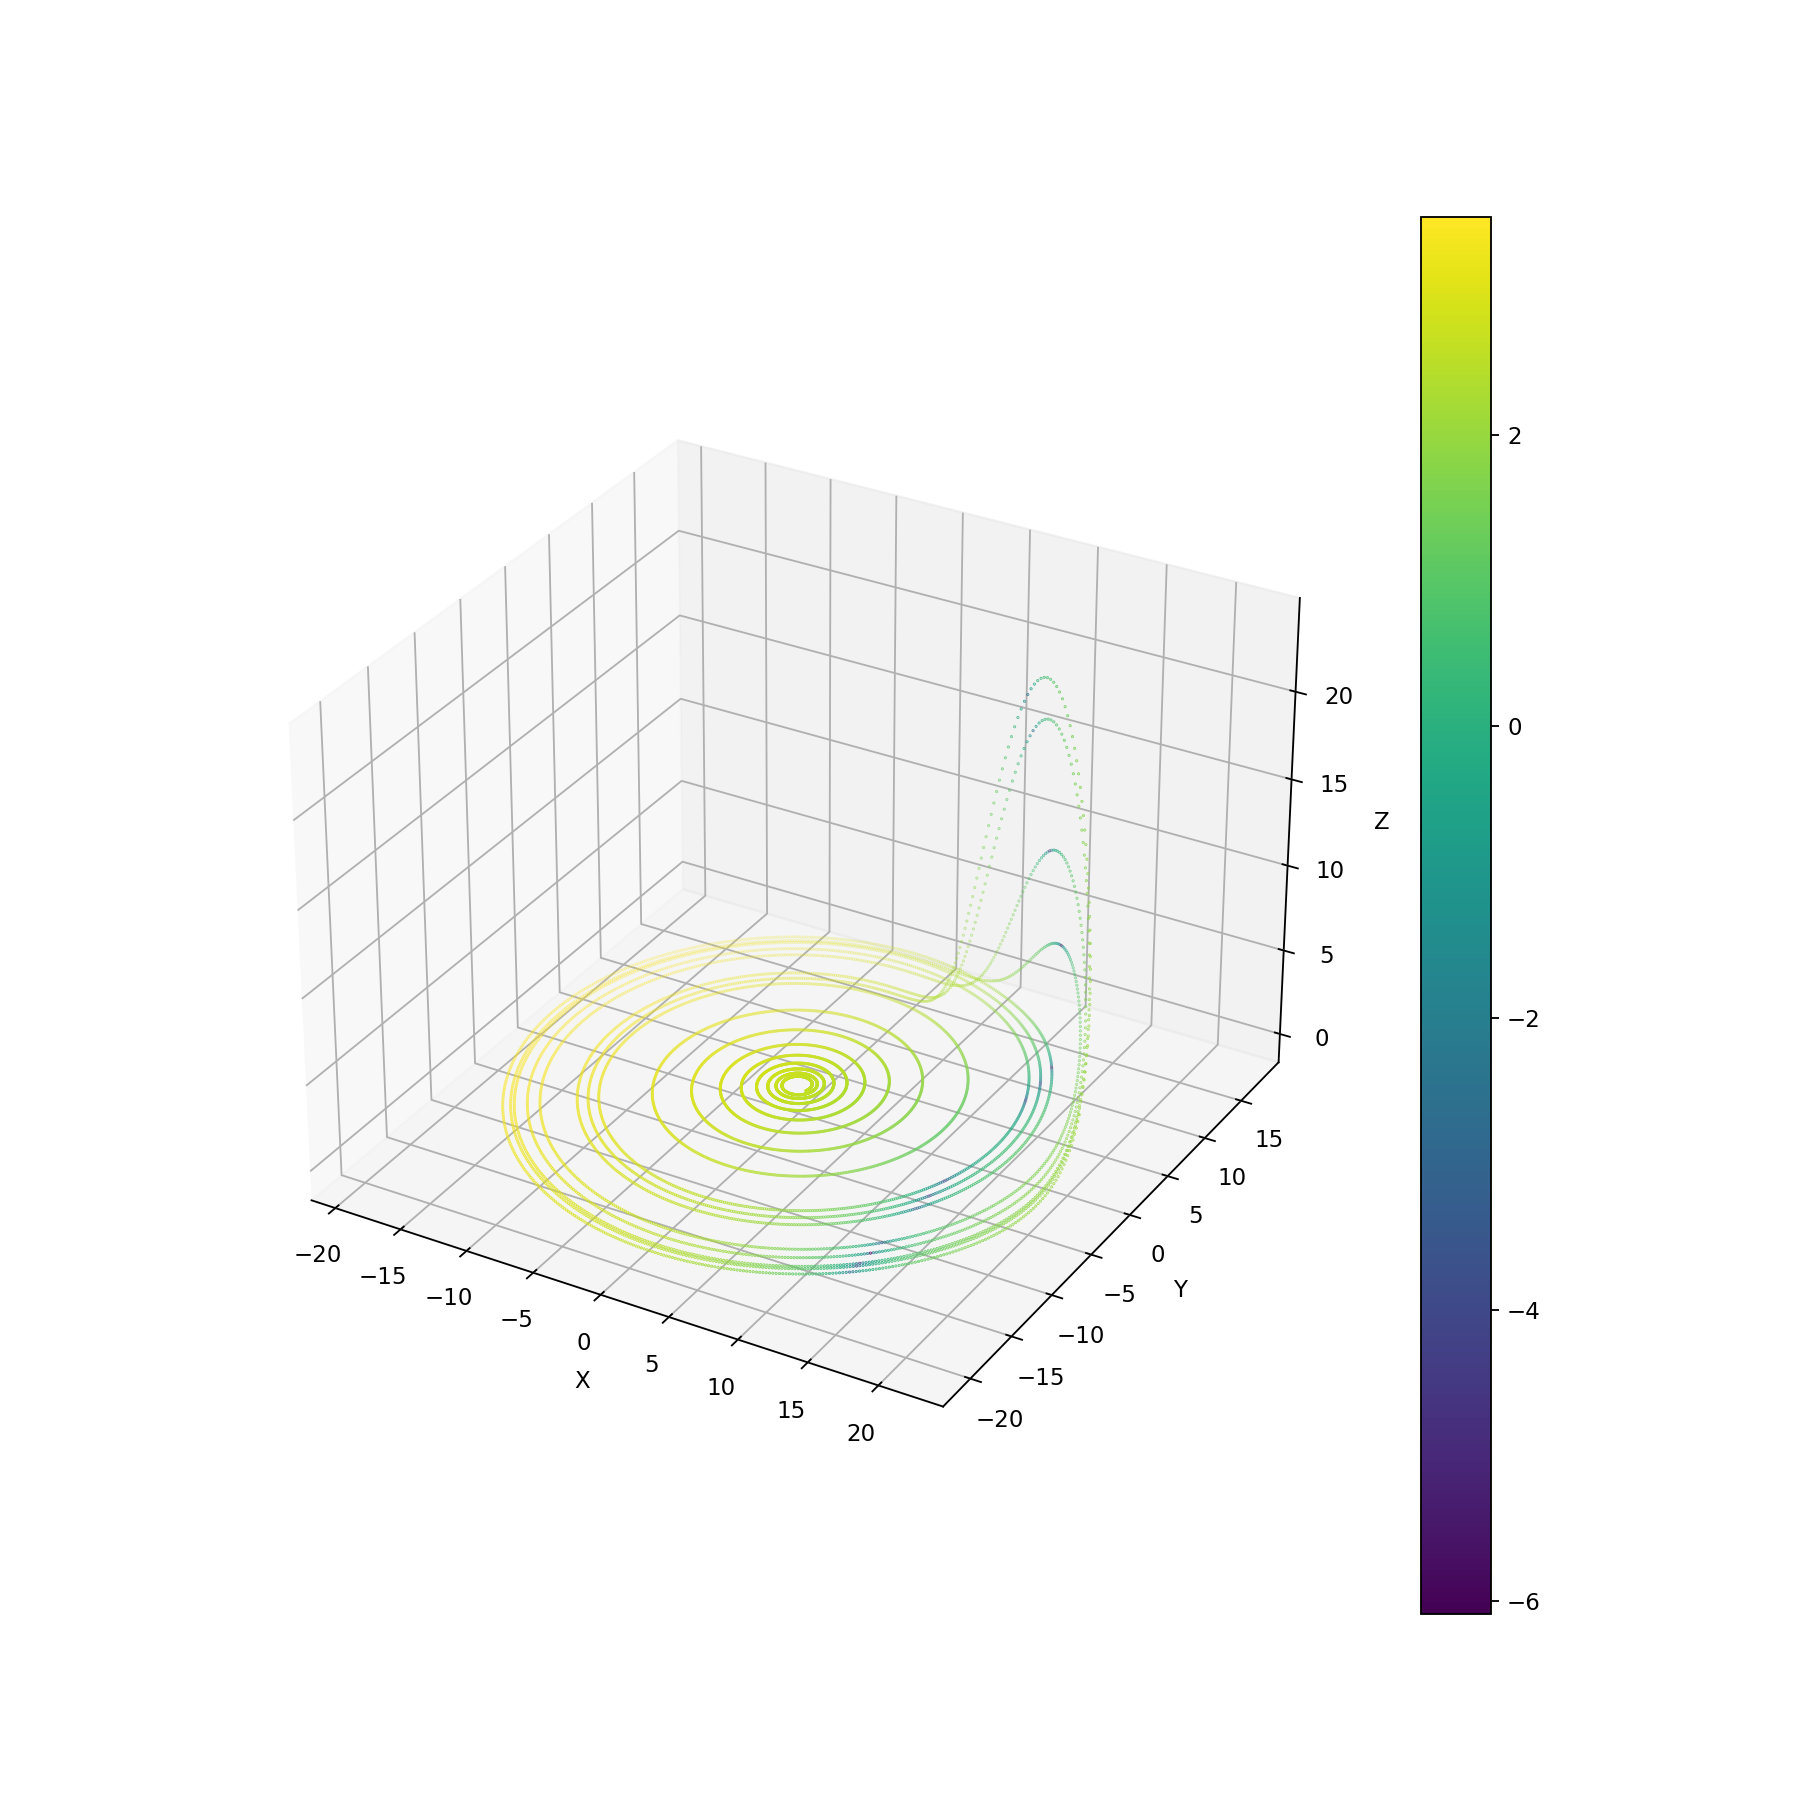

C:\Users\water\AppData\Local\Temp/ipykernel_16196/832872231.py:3: RuntimeWarning: divide by zero encountered in log
  q = ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.max(np.log(e),axis=1),s=0.1)


In [16]:
fig = plt.figure(figsize=[11,11])
ax = plt.axes(projection='3d')
q = ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.max(np.log(e),axis=1),s=0.1)
#ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,0], 10*v[::step,0,1], 10*v[::step,0,2],color='red')
#ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,1], 10*v[::step,1,1], 10*v[::step,2,1],color='green')
#ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,2], 10*v[::step,1,2], 10*v[::step,2,2],color='blue')
plt.colorbar(q)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [5]:
5.0^7

TypeError: unsupported operand type(s) for ^: 'float' and 'int'

<IPython.core.display.Javascript object>


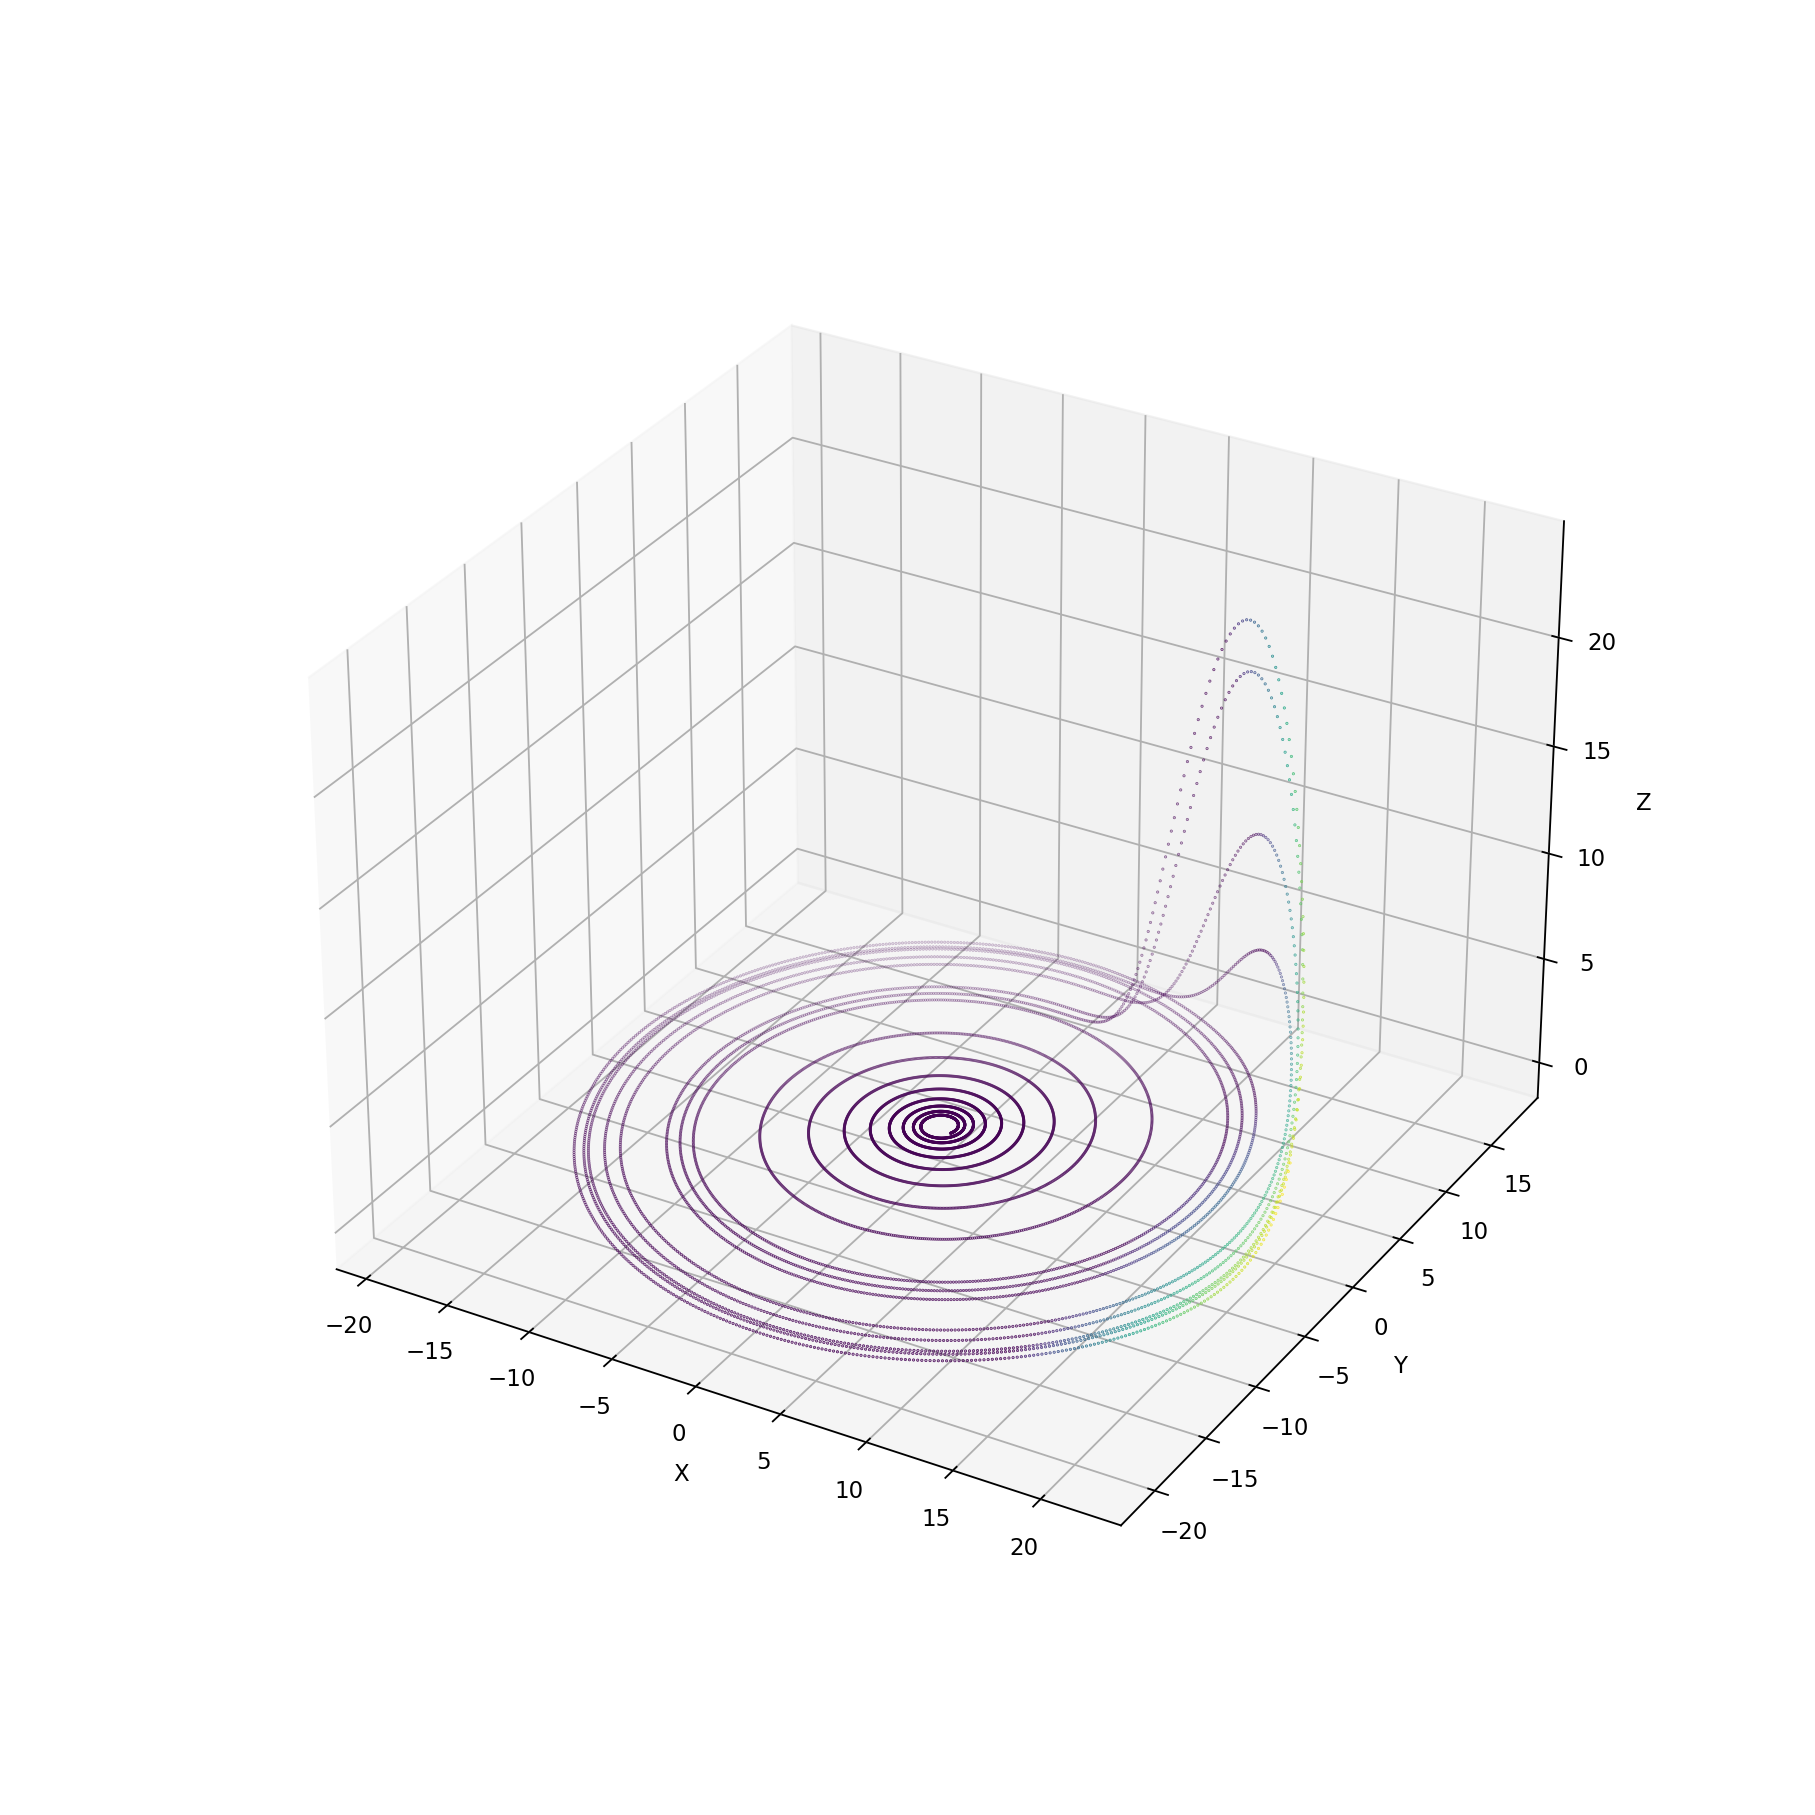

In [19]:
step=50
v = np.zeros((len(xi),d,d))

for i in np.arange(0,len(xi),step):
    J=Ji(xi[i])
    ds = fi(xi[i],0)
    R=rotation_manager.get_rot(ds)
    v[i]=R


fig = plt.figure(figsize=[11,11])
ax = plt.axes(projection='3d')
ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.max(np.real(e),axis=1),s=0.1)
#ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,0], 10*v[::step,0,1], 10*v[::step,0,2],color='red')
#ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,1], 10*v[::step,1,1], 10*v[::step,2,1],color='green')
#ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,2], 10*v[::step,1,2], 10*v[::step,2,2],color='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



<IPython.core.display.Javascript object>


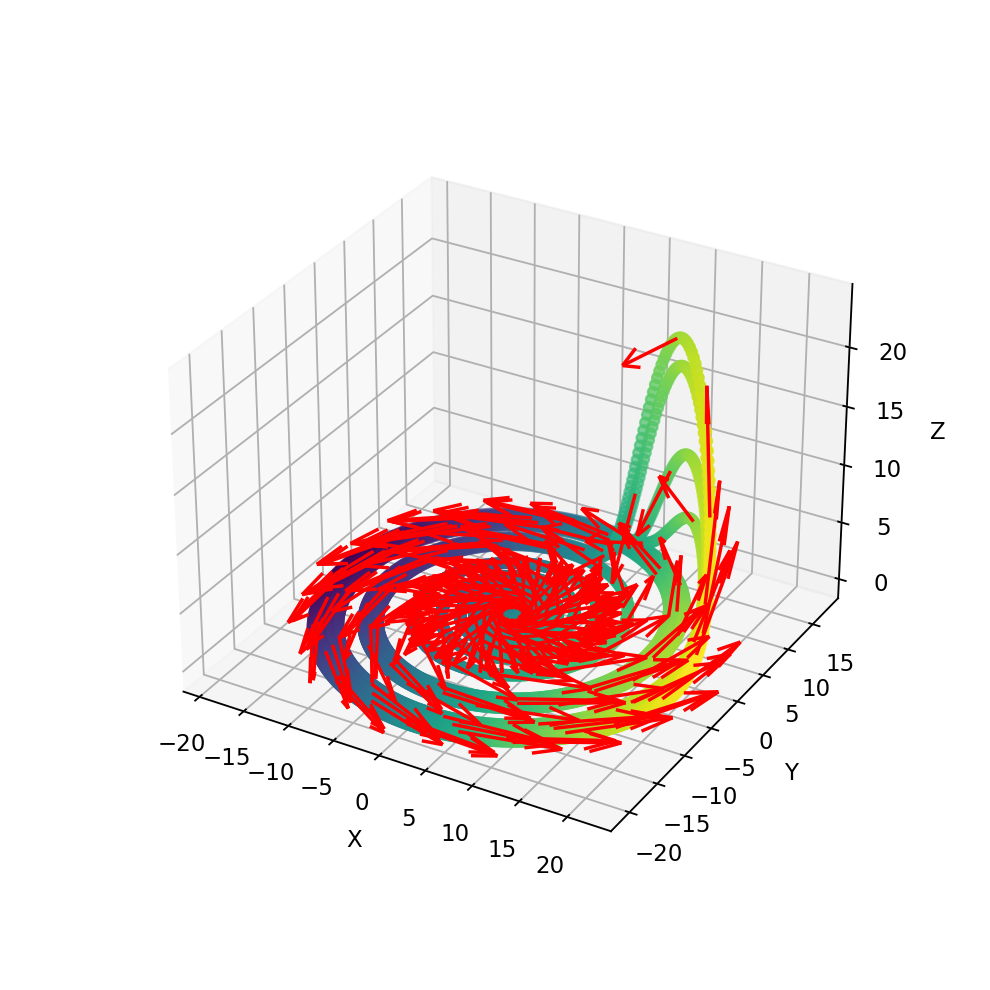

In [20]:
fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')
ax.scatter3D(xi[:,0], xi[:,1], xi[:,2], c=np.sum(np.real(e),axis=1))
ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,0], 10*v[::step,0,1], 10*v[::step,0,2],color='red')
#ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,1], 10*v[::step,1,1], 10*v[::step,2,1],color='green')
#ax.quiver(xi[::step,0], xi[::step,1], xi[::step,2], 10*v[::step,0,2], 10*v[::step,1,2], 10*v[::step,2,2],color='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
